In [3]:
"""
Import packages 
"""
import os 
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost as xgb 
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [4]:
"""
Ignore all warnings and set working directory for this project
"""
warnings.filterwarnings('ignore')
os.chdir('C:/Users/Administrator/Desktop/Projects/Titanic/Datasets')

In [5]:
"""
Import datasets 
"""

df = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv')
test_ids = df_test['PassengerId']

In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
"""
Exploratory Data Analysis 
"""

df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data dictionary from Kaggle is as follows: 

* survival : Survival (0 = No, 1 = Yes)
* pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex : Sex 	
* Age : Age in years 	
* sibsp : # of siblings / spouses aboard the Titanic 	
* parch : # of parents / children aboard the Titanic 	
* ticket : Ticket number 	
* fare 	: Passenger fare 	
* cabin : Cabin number 	
* embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
n_rows, n_cols = df.shape
print(f"Number of rows is {n_rows}")
print(f"Number of columns is {n_cols}")

Number of rows is 891
Number of columns is 12


In [9]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
df.head(10)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
df.isnull().sum() # Check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values: 
* Age : 177 
* Cabin : 687 
* Embarked : 2

Using count(), find out the percentage of variables with missing data

In [14]:
round( (1 - (df.count() / n_rows)) * 100 , 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Given that there are only 2 rows with missing values in `Embarked`, we remove these rows entirely. 


In [15]:
df.dropna(subset=['Embarked'], inplace = True)

n_rows, n_cols = df.shape
print(f"There are now {n_rows} rows in the dataframe")

There are now 889 rows in the dataframe


In regards to missing values in `Age`, we fill them with the median age. We fill in the value in the 1 row with missing values in `Fare` for the test data set with its mean. We also fill the missing `Age` with the training set mean. 

In [16]:
while df['Age'].isnull().values.any():
    df['Age'].fillna(df['Age'].median(), inplace = True)

while df_test['Age'].isnull().values.any():
    df_test['Age'].fillna(df['Age'].median(), inplace = True)

while df_test['Fare'].isnull().values.any():
    df_test['Fare'].fillna(df['Fare'].mean(), inplace = True)

df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

We then proceed to remove columns are not relevant which do not affect the outcome of our prediction like `PassengerId`, and `Ticket` as well as `Cabin` which has too many missing values that cannot be replaced with our current information.

Although `Name` can be a useful feature, we currently lack the knowledge on how to make it useful. Therefore, for this analysis, we will drop it. However, as we learn more about ML, we will revisit this competition to include `Name` as a feature. 

In [17]:
df = df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

n_rows, n_cols = df.shape
print(f"There are now {n_cols} columns in the dataframe")
df.head()            

There are now 8 columns in the dataframe


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We encoded Gender using binary encoding as it is a binary categorical variable that takes in only 2 values - "Male" and "Female".
We remove the column `Sex` now that we have performed the necessary encoding.

|Gender|<p align="Right"> Encoded Values|
|:---:|:---:
|Male| <p align="right"> 0 |
|Female|<p align="right"> 1 | 


In [18]:
encoding = {"male":0, "female":1}
df["Gender_Encoded"] = df["Sex"].map(encoding)
df = df.drop('Sex', axis = 1)

df_test["Gender_Encoded"] = df_test["Sex"].map(encoding)
df_test = df_test.drop('Sex', axis = 1)


df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender_Encoded
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0
5,0,3,28.0,0,0,8.4583,Q,0
6,0,1,54.0,0,0,51.8625,S,0
7,0,3,2.0,3,1,21.0750,S,0
8,1,3,27.0,0,2,11.1333,S,1
9,1,2,14.0,1,0,30.0708,C,1


We perform one-hot coding on embarked column as there is no ordering to the three cities (C, S, Q) in which the passenger embarked


In [19]:
df = pd.get_dummies(df, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_Encoded,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,False,False,True
1,1,1,38.0,1,0,71.2833,1,True,False,False
2,1,3,26.0,0,0,7.9250,1,False,False,True
3,1,1,35.0,1,0,53.1000,1,False,False,True
4,0,3,35.0,0,0,8.0500,0,False,False,True
5,0,3,28.0,0,0,8.4583,0,False,True,False
6,0,1,54.0,0,0,51.8625,0,False,False,True
7,0,3,2.0,3,1,21.0750,0,False,False,True
8,1,3,27.0,0,2,11.1333,1,False,False,True
9,1,2,14.0,1,0,30.0708,1,True,False,False


For qualitative data such as 'Survived', 'Pclass', 'SibSp', 'Parch', 'Gender_Encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S' we plot them into a simple bar graph.

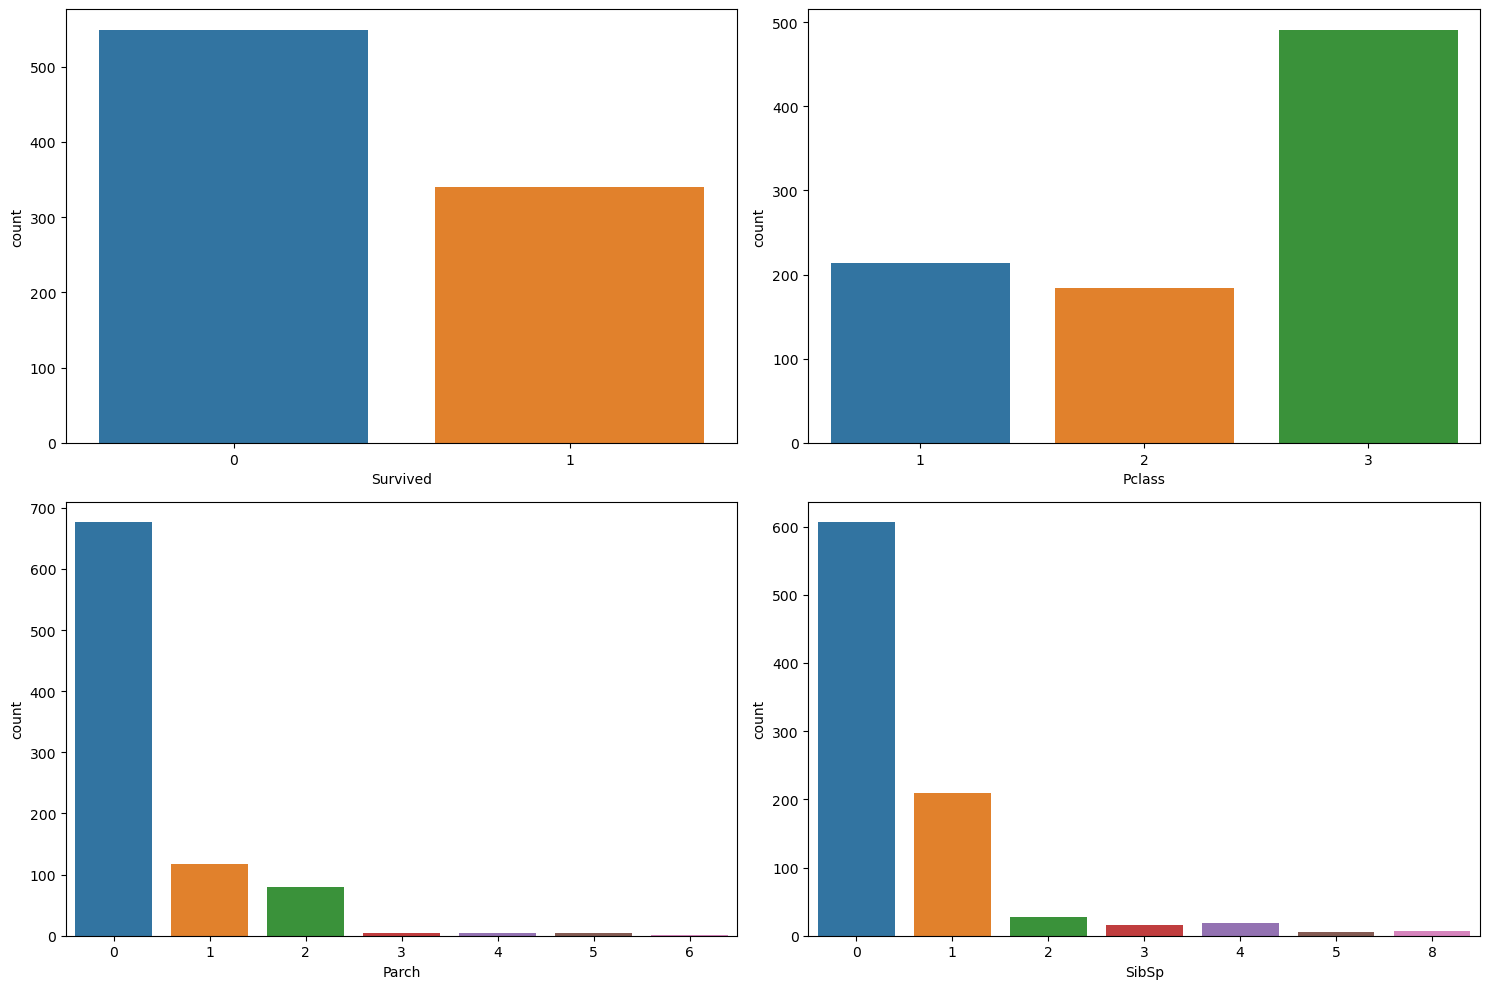

In [20]:
df2 =  df[['Survived', 'Pclass', 'Parch', 'SibSp']]
plt.figure(figsize=(15, 10))

for i, col in enumerate(df2):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, ax=ax) 
plt.tight_layout()

From the bar graph of the last 4 variables
<ul>
    <li> More people died than survived. </li>
    <li> The number of passengers with Ticket Class 3 is almost equal to the number of passengers with Ticket Classes 1 and 2 combined  </li>
    <li> The majority of passengers are not parents and do not have siblings / spouses onboard. </li>
<ul>

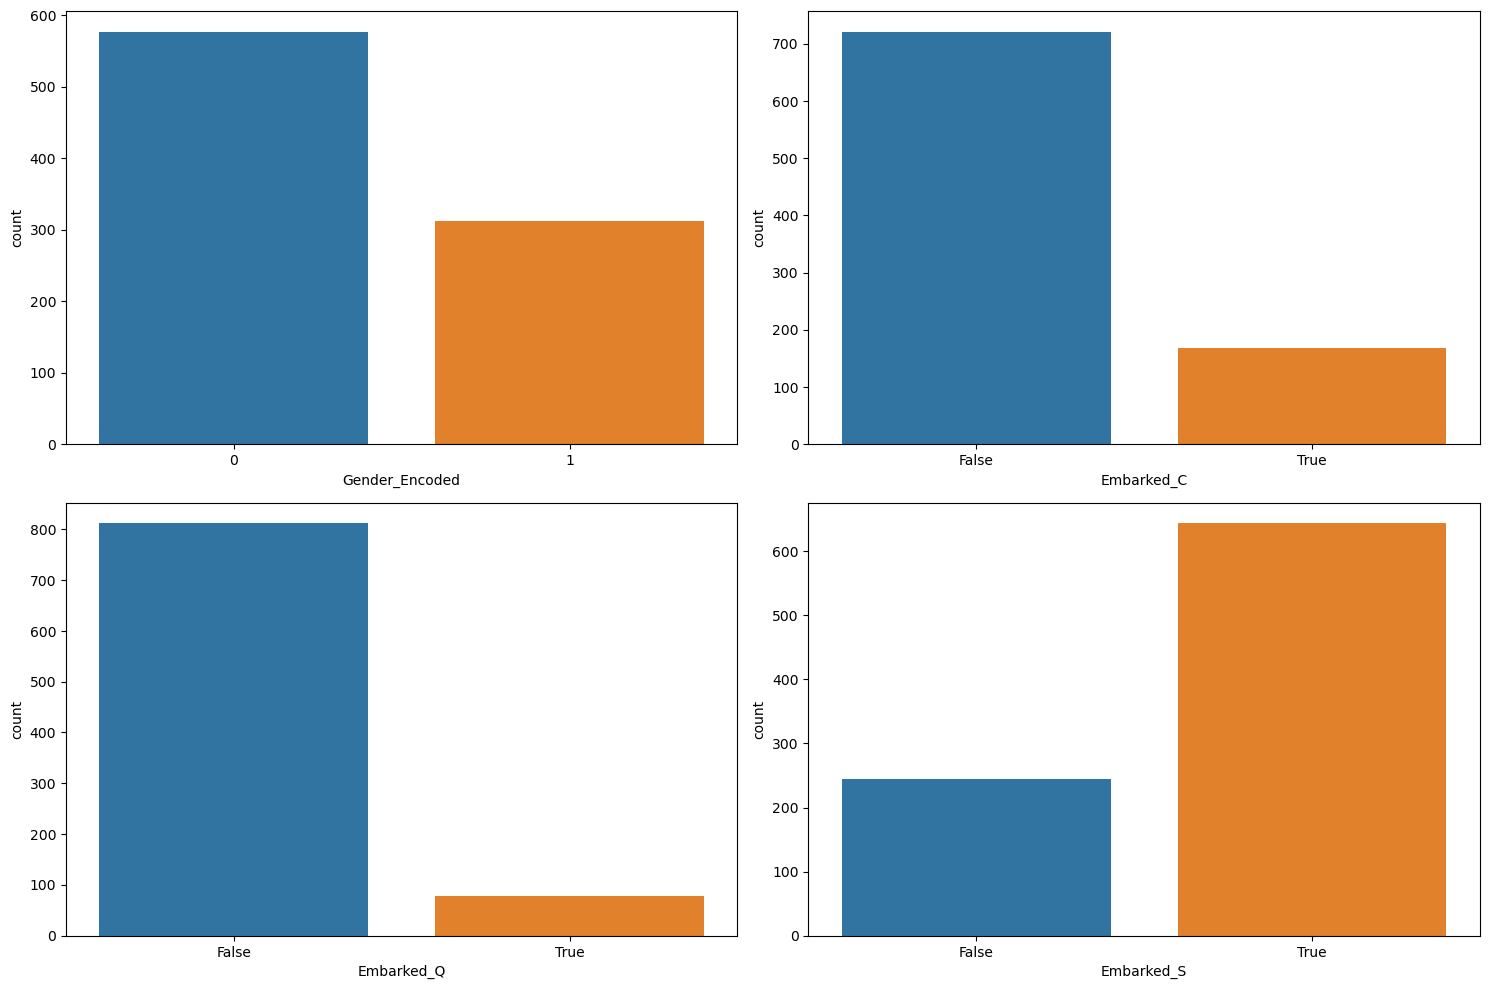

In [21]:
df3 =  df[['Gender_Encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
plt.figure(figsize=(15, 10))

for i, col in enumerate(df3):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, ax=ax) 
plt.tight_layout()

From the bar graph of the last 4 variables
<ul>
    <li> There are more male passengers than female passengers </li>
    <li> The majority of passengers embarked from Port S </li>
<ul>

For the other numerical data such as 'Age' and 'Fare' we plot them into histograms

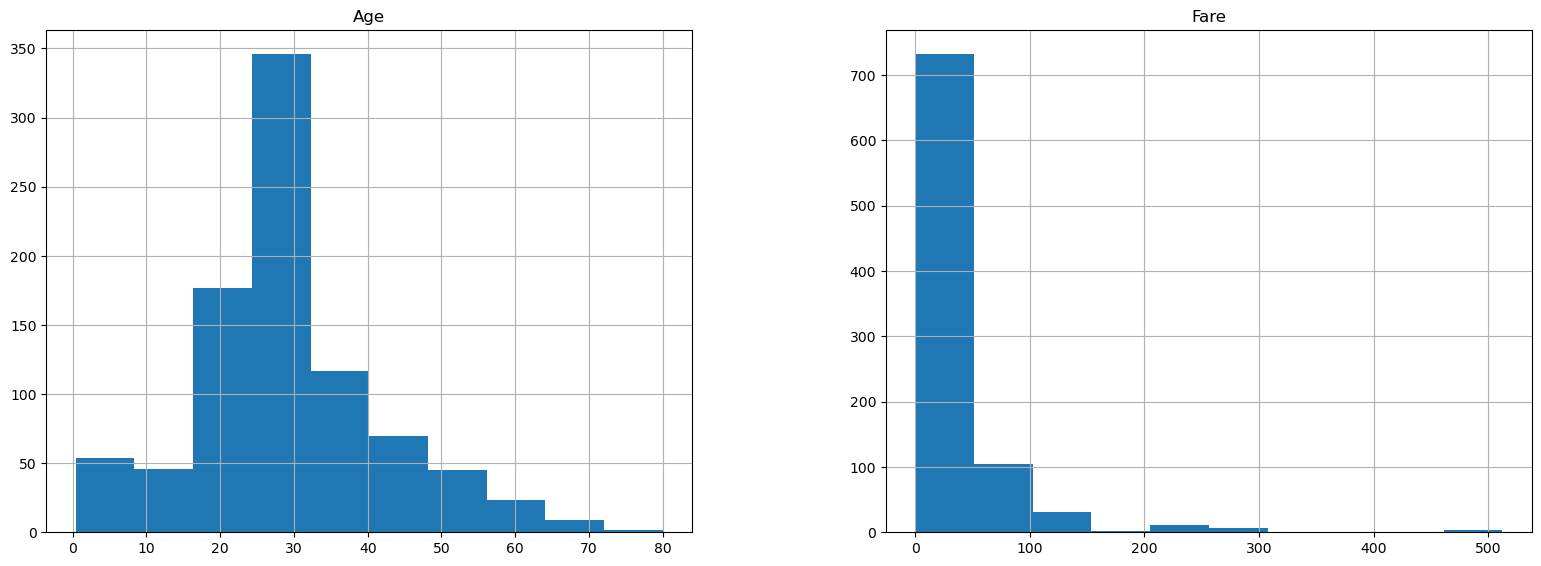

In [22]:
df4 = df[['Age', 'Fare']]

df4.hist(layout=(2, 3), figsize=(30, 15))
plt.show()

From the histograms, we can see that Age is more centered while for the fare, it is heavily skewed towards the left.
The skew could be due to the fact that around half of the passengers bought Tickets of Class 3

# Testing several models

We have finished EDA and now proceed to implementing models. We do not do hyperparameter tuning or any in depth validation; the training set is split into a smaller training and validation set randomly. 

In [23]:
"""
Split training set into validation set and smaller training set
"""
y = df['Survived']
X = df.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

We try several different models. 
1. Logistic Regression
2. XGBoost Classifier
3. Adaboost Classifier
4. Catboost Classifier 

In [42]:
"""
Logit Model
"""
clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_train, y_train)

predictions = clf.predict(X_val)
logit_acc = accuracy_score(y_val, predictions)
print(f"Accuracy of Logistic Regression: {logit_acc}")

Accuracy of Logistic Regression: 0.7808988764044944


In [41]:
"""
XGBoost Model
"""
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

acc_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb}")

XGBoost Accuracy: 0.8033707865168539


In [26]:
"""
Adaboost Model
"""
ada_model = AdaBoostClassifier(n_estimators=50, random_state=12)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_val)

# Calculate accuracy
acc_ada = accuracy_score(y_val, y_pred_ada)
print(f"Test Accuracy: {acc_ada}")

Test Accuracy: 0.8146067415730337


In [32]:
"""
Catboost Model
"""

catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_val)

acc_catboost = accuracy_score(y_val, y_pred_catboost)
print(f'CatBoost Accuracy: {acc_catboost:.2f}')

CatBoost Accuracy: 0.79


Adaboost has the best accuracy out of the 4 models considered on the training set. We will use this model for the submission. First we visualise the accuracies

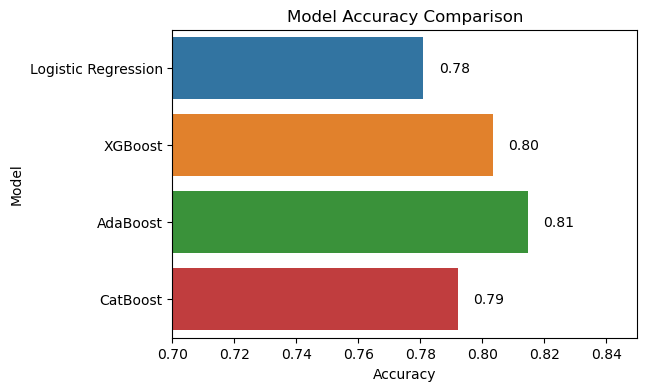

In [46]:
accuracies = {
    'Model': ['Logistic Regression', 'XGBoost', 'AdaBoost', 'CatBoost'],
    'Accuracy': [logit_acc, acc_xgb, acc_ada, acc_catboost] 
}

plt.figure(figsize=(6, 4))
sns.barplot(x='Accuracy', y='Model', data=df_accuracies)

for index, value in enumerate(df_accuracies['Accuracy']):
    plt.text(value + 0.005, index, f'{value:.2f}', va='center') 

plt.title('Model Accuracy Comparison')
plt.xlim(0.7, 0.85) 
plt.xlabel('Accuracy')
plt.ylabel('Model')

plt.show()

In [28]:
"""
Prepare results csv and submit
"""

ada_test_pred = ada_model.predict(df_test)


In [29]:
submission_titanic = pd.DataFrame({
    'PassengerId': test_ids,  
    'Survived': ada_test_pred  
})

In [30]:
submission_titanic.to_csv('titanic_predictions.csv', index=False)